# Anime Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the datasets
animes = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/Projects/Project-Week-6/your-project/Datasets/\
myanimelist-dataset-animes-profiles-reviews/animes.csv')

profiles = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/Projects/Project-Week-6/your-project/Datasets/\
myanimelist-dataset-animes-profiles-reviews/profiles.csv')

reviews = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/Projects/Project-Week-6/your-project/Datasets/\
myanimelist-dataset-animes-profiles-reviews/reviews.csv')

In [3]:
# Dropping duplicates from all dataframes
animes.drop_duplicates(inplace = True)
profiles.drop_duplicates(inplace = True)
reviews.drop_duplicates(inplace = True)

In [4]:
# Cleaning the profiles DF
profiles_exp = profiles.copy()
'''
Had to do all these replaces because initially this column had the rows in what seemed to be a list, but Pandas was
not recognized it as such, but as a long string.
After doing all the replaces I ended up with what actually looked like a long string without those removed characters,
and then by doing a split it got me the list I needed to 'explode' it later to have only a single value per row
'''
# Removing the quotes between each number, the brackets and spaces. Now it's basically a long string w/ commas
profiles_exp['favorites_anime'] = profiles_exp['favorites_anime'].str.replace("'", '')
profiles_exp['favorites_anime'] = profiles_exp['favorites_anime'].str.replace("[", '')
profiles_exp['favorites_anime'] = profiles_exp['favorites_anime'].str.replace("]", '')
profiles_exp['favorites_anime'] = profiles_exp['favorites_anime'].str.replace(" ", '')

# Splitting the column to now make it into a list format like I've always wanted, to then explode it
profiles_exp['favorites_anime'] = profiles_exp['favorites_anime'].str.split(',')

# Exploding the column to have only a single favorite anime per row
profiles_exp = profiles_exp.explode('favorites_anime')

# Dropping the link column
profiles_exp.drop(columns = 'link', inplace = True)

profiles_exp

,profile,gender,birthday,favorites_anime
0,DesolatePsyche,Male,"Oct 2, 1994",33352
0,DesolatePsyche,Male,"Oct 2, 1994",25013
0,DesolatePsyche,Male,"Oct 2, 1994",5530
0,DesolatePsyche,Male,"Oct 2, 1994",33674
0,DesolatePsyche,Male,"Oct 2, 1994",1482
...,...,...,...,...
77657,bridgesams,Male,"Jan 1, 2001",37450
77657,bridgesams,Male,"Jan 1, 2001",11843
77659,Officer_Anime,NaN,NaN,
77660,Yuez,NaN,NaN,


In [5]:
print(profiles_exp.isna().sum())
print('')
print(profiles_exp['gender'].unique())

profile                0
gender             57982
birthday           76539
favorites_anime        0
dtype: int64

['Male' 'Female' nan 'Non-Binary']


In [6]:
# Dropping img_url and link
reviews.drop(columns = 'link', inplace = True)
animes.drop(columns = ['img_url', 'link'], inplace = True)

In [7]:
animes['genre'].unique()

array(["['Comedy', 'Sports', 'Drama', 'School', 'Shounen']",
       "['Drama', 'Music', 'Romance', 'School', 'Shounen']",
       "['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']", ...,
       "['Sci-Fi', 'Mystery', 'Drama', 'Mecha', 'School']",
       "['Sports', 'Drama', 'Shounen']",
       "['Music', 'Romance', 'Super Power', 'Supernatural']"],
      dtype=object)

In [8]:
profiles_exp.head()

,profile,gender,birthday,favorites_anime
0,DesolatePsyche,Male,"Oct 2, 1994",33352
0,DesolatePsyche,Male,"Oct 2, 1994",25013
0,DesolatePsyche,Male,"Oct 2, 1994",5530
0,DesolatePsyche,Male,"Oct 2, 1994",33674
0,DesolatePsyche,Male,"Oct 2, 1994",1482


In [9]:
reviews.head()

,uid,profile,anime_uid,text,score,scores
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8..."
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9..."
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9..."
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ..."


In [10]:
# Merging anime with reviews
merged = animes.merge(reviews, how = 'left', left_on = 'uid', right_on = 'anime_uid')
merged.head()

,uid_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,uid_y,profile,anime_uid,text,score_y,scores
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,253664.0,skrn,28891.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '9..."
1,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,254554.0,Tactician,28891.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ..."
2,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,271227.0,CallMeDette,28891.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ..."
3,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,284956.0,jason200911,28891.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '7..."
4,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,249279.0,comiclove,28891.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '7', 'Animation': '7..."


In [11]:
# Dropped it before so no more dupes
merged.duplicated().sum() # with explode: 833k | after no explode: 186k

0

In [12]:
print(animes.shape)
print(reviews.shape)
print(merged.shape) # before left_on and right_on: 67346 | now: around 1.4kk | without dupes: 573k
# w/o dupes and no genre explode: 140k

(16368, 10)
(130519, 6)
(140041, 16)


In [13]:
print(profiles_exp.shape)

# Merging the already merged dataframe with profiles now
######## Maybe I shouldn't merge the exploded profiles?? ########
merged = merged.merge(profiles, how = 'left', on = 'profile')
merged.head()

(227230, 4)


,uid_x,title,synopsis,genre,aired,episodes,members,popularity,ranked,score_x,uid_y,profile,anime_uid,text,score_y,scores,gender,birthday,favorites_anime,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,253664.0,skrn,28891.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '9...",NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
1,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,254554.0,Tactician,28891.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Male,"Sep 24, 1987","['263', '1559', '5507', '392', '876']",https://myanimelist.net/profile/Tactician
2,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,271227.0,CallMeDette,28891.0,\n \n \n \n ...,10.0,"{'Overall': '10', 'Story': '10', 'Animation': ...",Female,NaN,"['31964', '13601', '37105']",https://myanimelist.net/profile/CallMeDette
3,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,284956.0,jason200911,28891.0,\n \n \n \n ...,7.0,"{'Overall': '7', 'Story': '7', 'Animation': '7...",NaN,NaN,"['19815', '18671', '14741', '22789', '4181', '...",https://myanimelist.net/profile/jason200911
4,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,249279.0,comiclove,28891.0,\n \n \n \n ...,8.0,"{'Overall': '8', 'Story': '7', 'Animation': '7...",Non-Binary,"Dec 13, 1999","['1', '30', '35120', '467', '4087', '437', '57...",https://myanimelist.net/profile/comiclove


In [14]:
print(merged.shape)
print(merged.duplicated().sum()) # 993 w/ exploded profiles

# Dropping the duplicates
merged.drop_duplicates(inplace = True)
print(merged.duplicated().sum()) # checking for dupes again

(140245, 20)
0
0


In [15]:
# Removing the quotes between each genre, the brackets and spaces. Now it's basically a long string w/ commas
animes['genre'] = animes['genre'].str.replace("'", '')
animes['genre'] = animes['genre'].str.replace("[", '')
animes['genre'] = animes['genre'].str.replace("]", '')
animes['genre'] = animes['genre'].str.replace(" ", '')

# Splitting the column to now make it into a list format like I've always wanted, to then explode it
animes['genre'] = animes['genre'].str.split(',')

# Exploding the column to have only a single genre per anime row
animes = animes.explode('genre')

# Removing this blank genre from the dataframe
animes = animes[animes['genre'] != '']

#animes.head()

# Exploratory Data Analysis

## Genres Analysis

### Top 10 Anime Genres

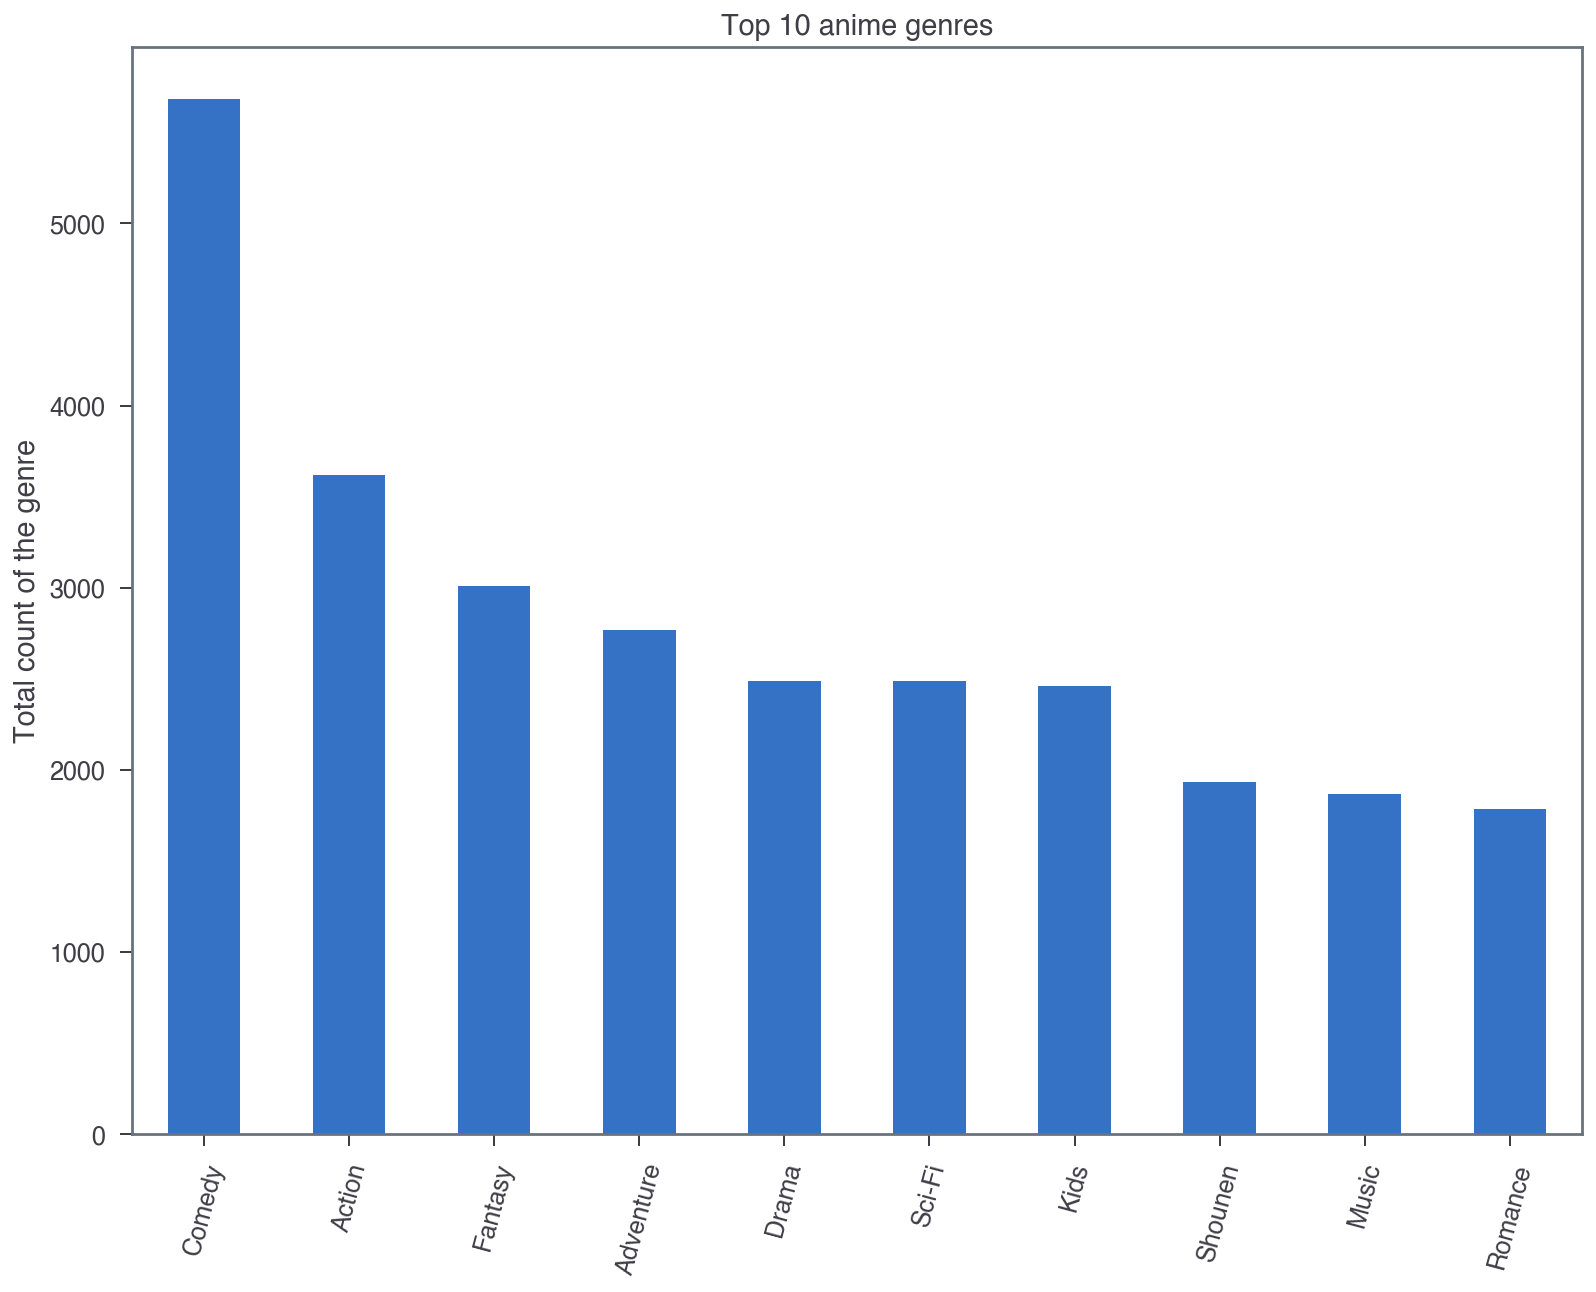

In [172]:
# Top 10 anime genres
animes['genre'].value_counts()[:10].plot(kind = 'bar', figsize = (13, 10), title = 'Top 10 anime genres', rot = 75)
plt.ylabel('Total count of the genre');
# label no y

### All Genres Percentage

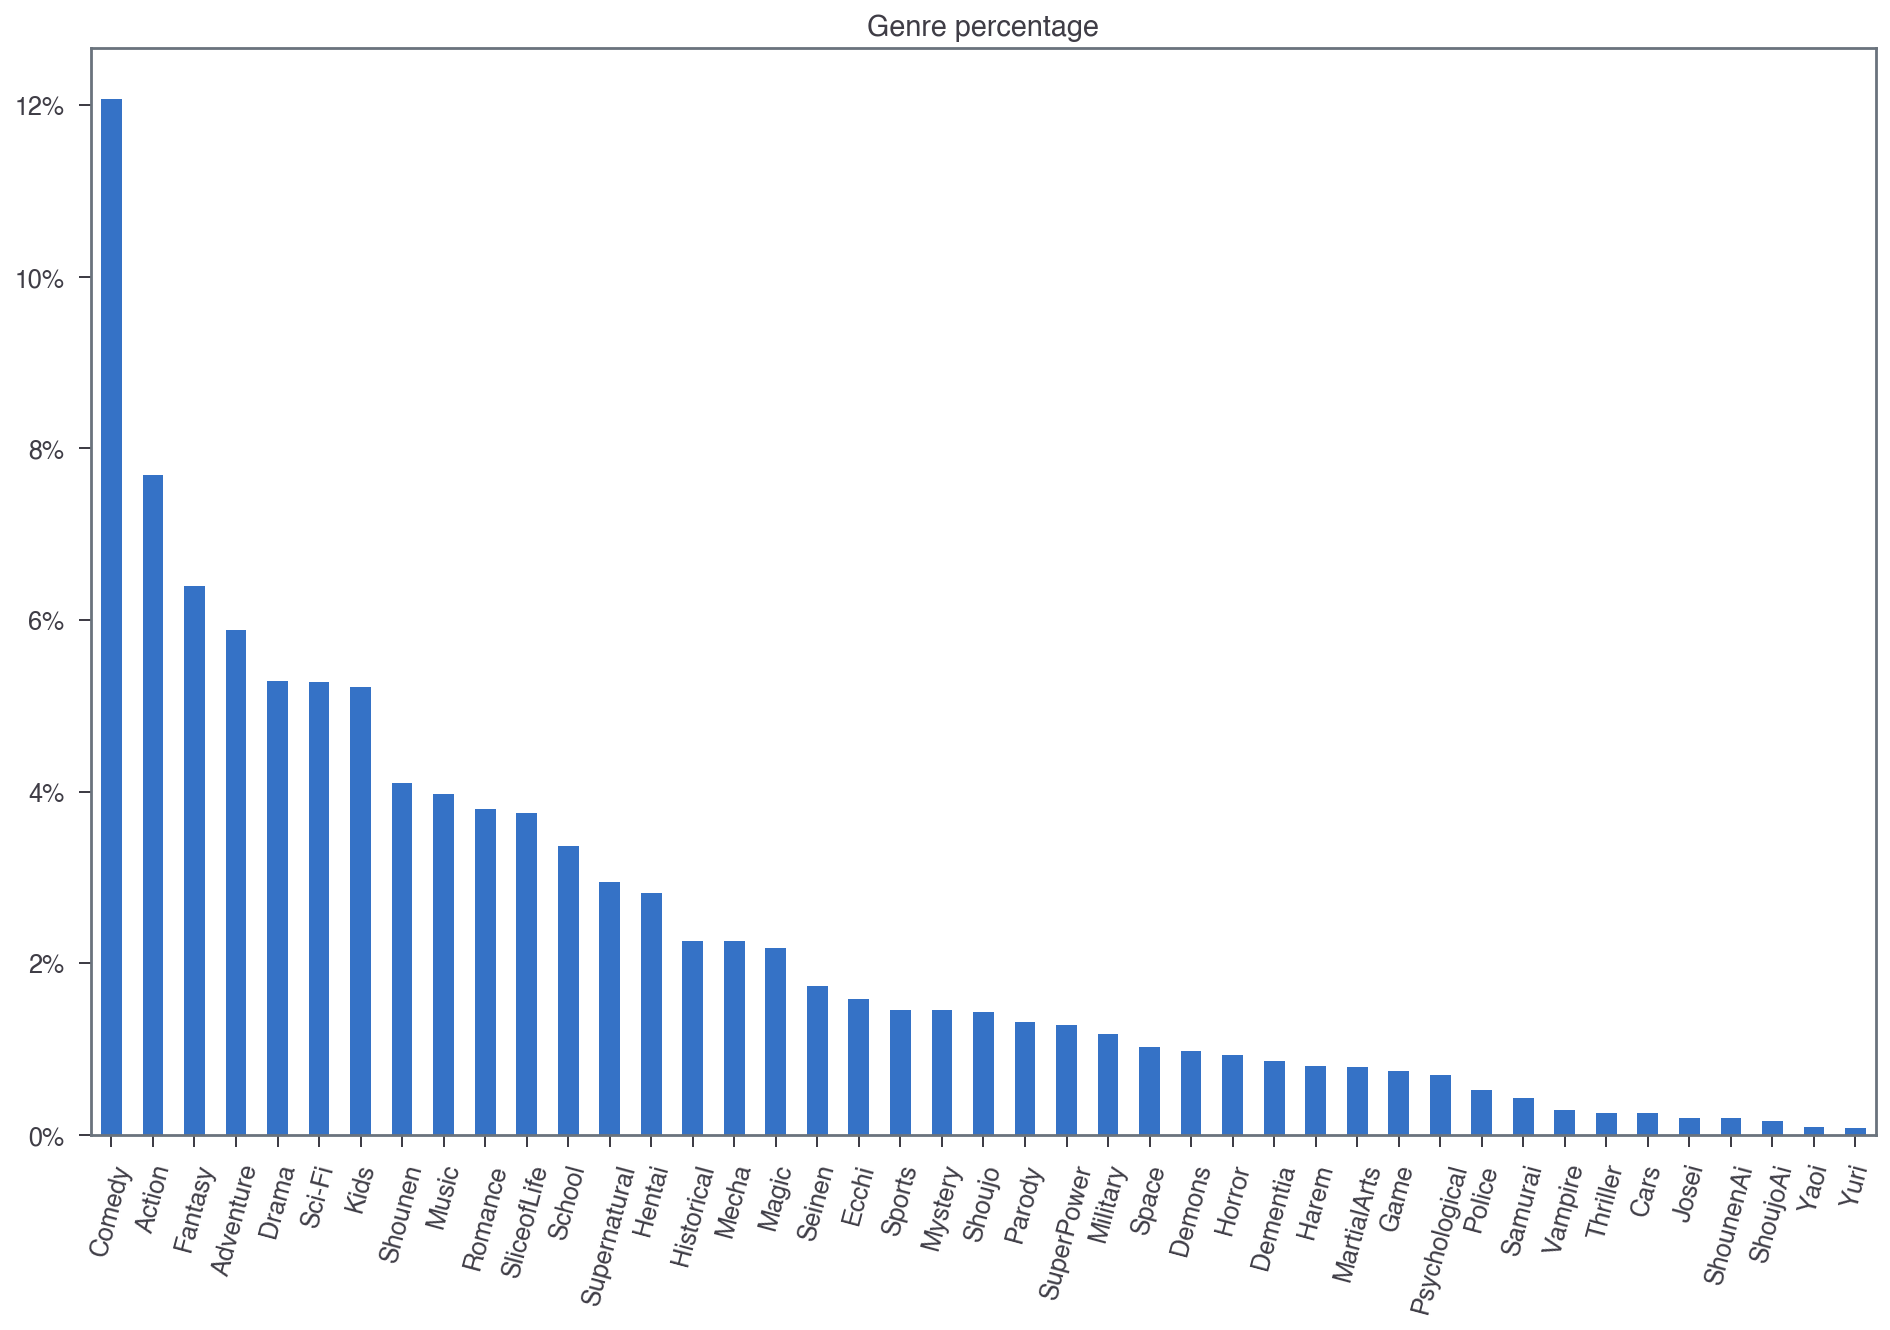

In [17]:
from matplotlib.ticker import FuncFormatter

(animes['genre'].value_counts() / animes.shape[0]).plot(kind = 'bar', figsize = (16, 10), 
                                                        title = 'Genre percentage', rot = 75)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

### Shape of the Genres distribution

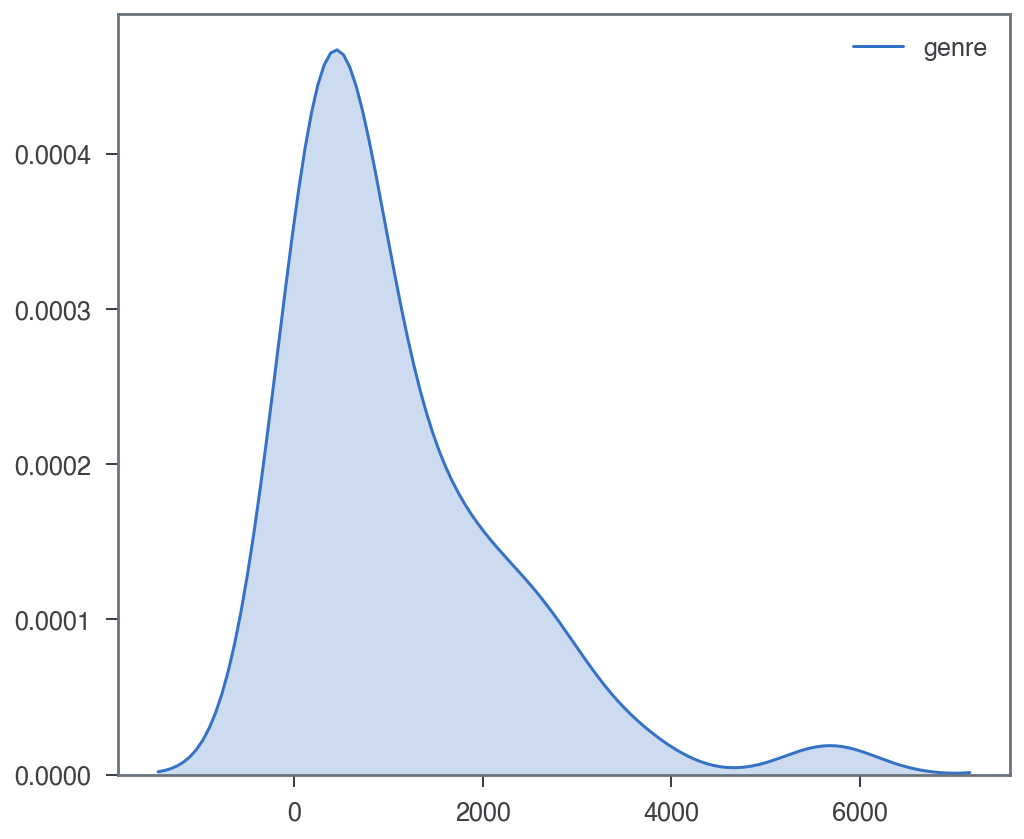

In [18]:
# Checking the shape. This basically tells us that there are a lot of genres around the 1.5k values
sns.kdeplot(animes['genre'].value_counts(), shade = True);

In [19]:
print('Exploded:')
print(profiles_exp.shape)
print(profiles_exp.isna().sum())
print('')
print('Non-exploded:')
print(profiles.shape)
print(profiles.isna().sum())

Exploded:
(227230, 4)
profile                0
gender             57982
birthday           76539
favorites_anime        0
dtype: int64

Non-exploded:
(47902, 5)
profile                0
gender             17012
birthday           21043
favorites_anime        0
link                   0
dtype: int64


### Most watched genres

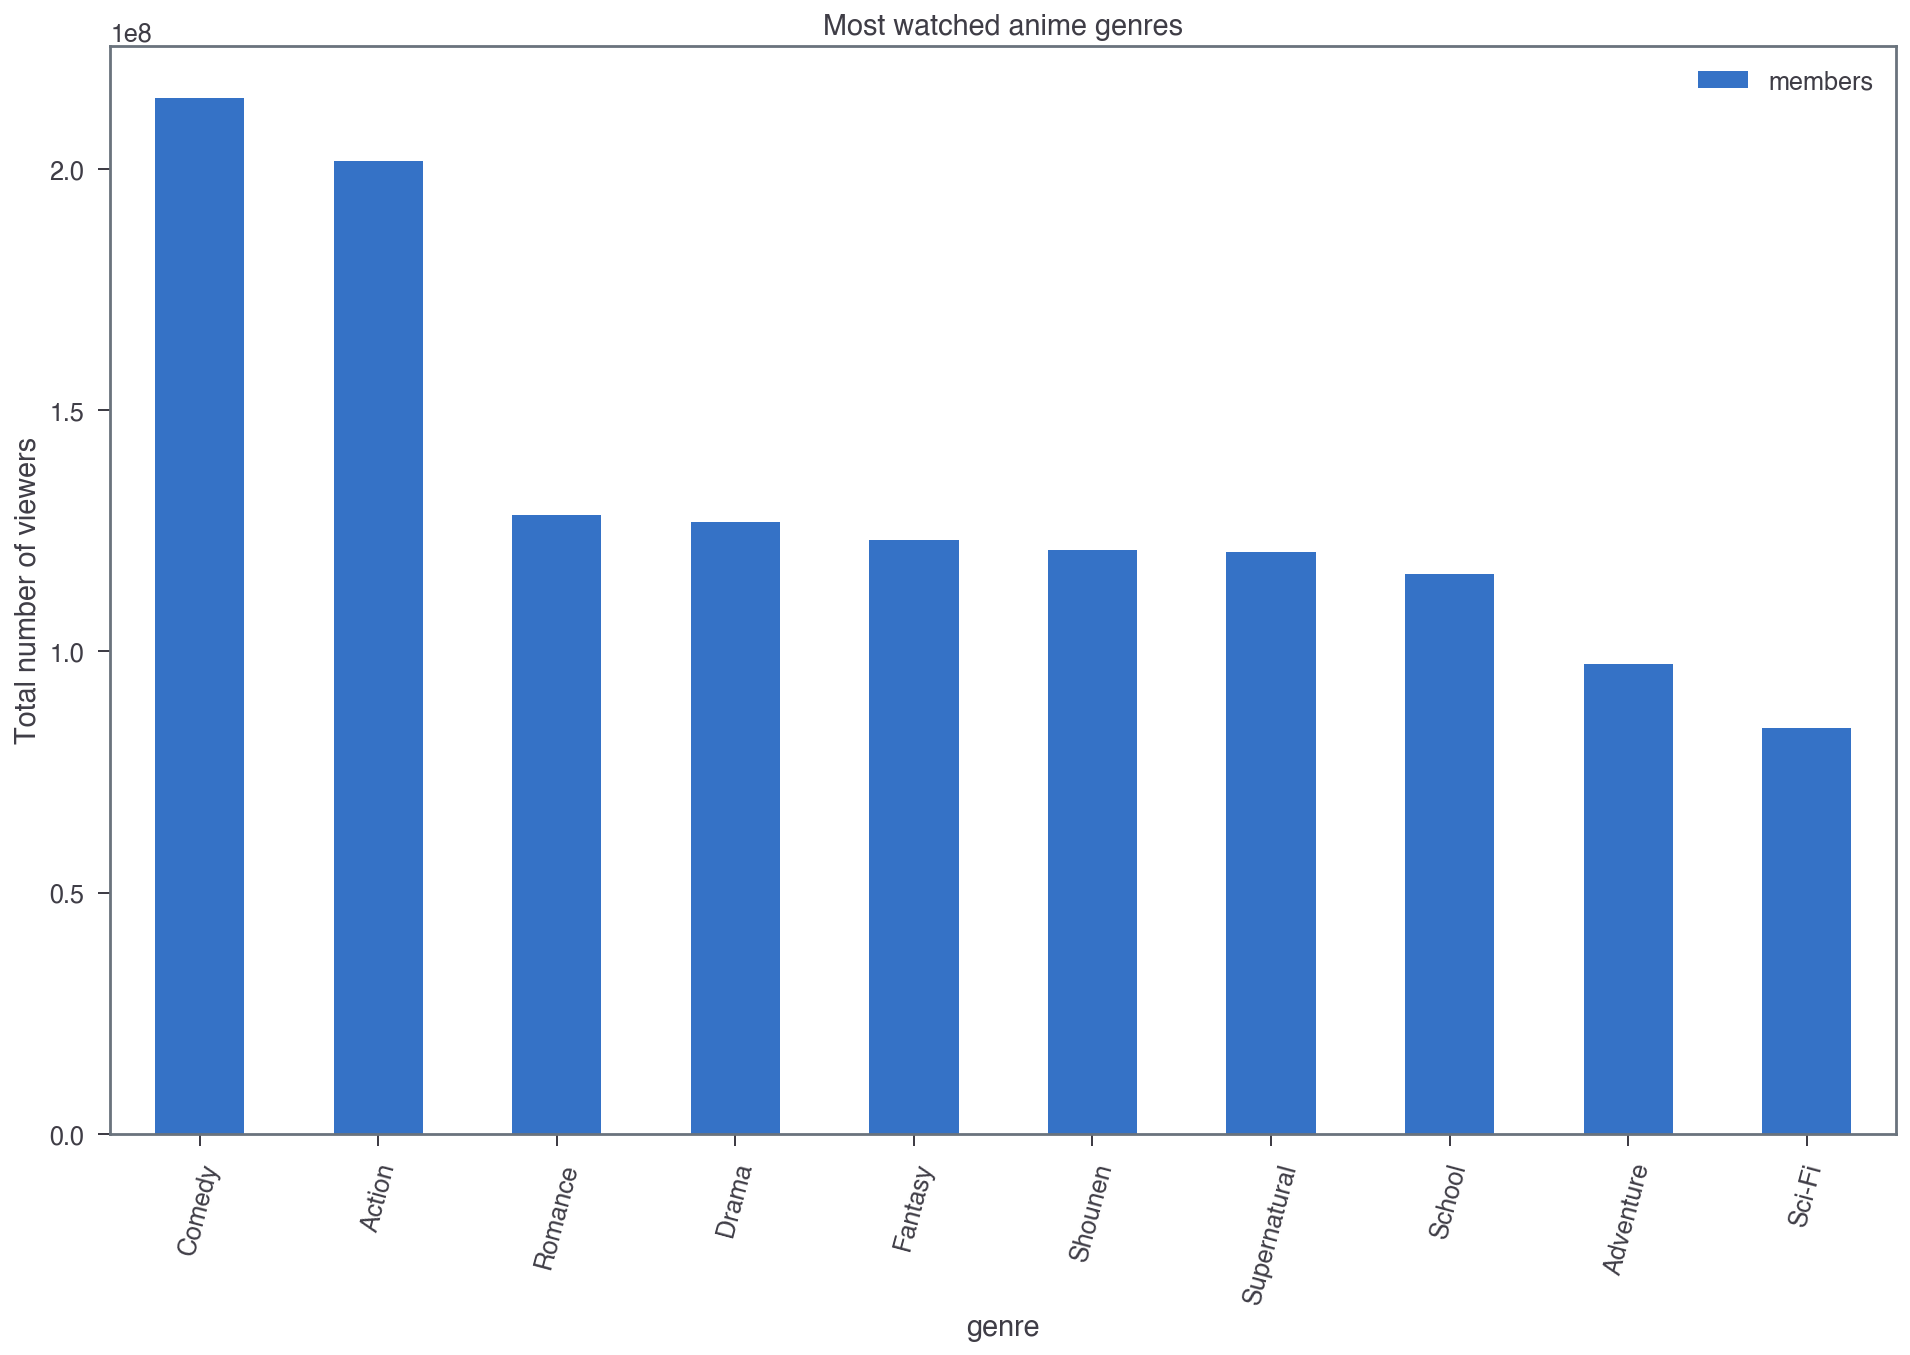

In [174]:
# Which genres are the most watched?
genre_memb = animes.groupby('genre', as_index = False).agg(
    {'members': 'sum'}).sort_values('members', ascending = False).reset_index(drop = True)

# Plot to visualize the most watched anime genres
genre_memb[:10].plot(x = 'genre', y = 'members', kind = 'bar', figsize = (16, 10), 
                title = 'Most watched anime genres', rot = 75)
plt.ylabel('Total number of viewers');

### Highest scored genres

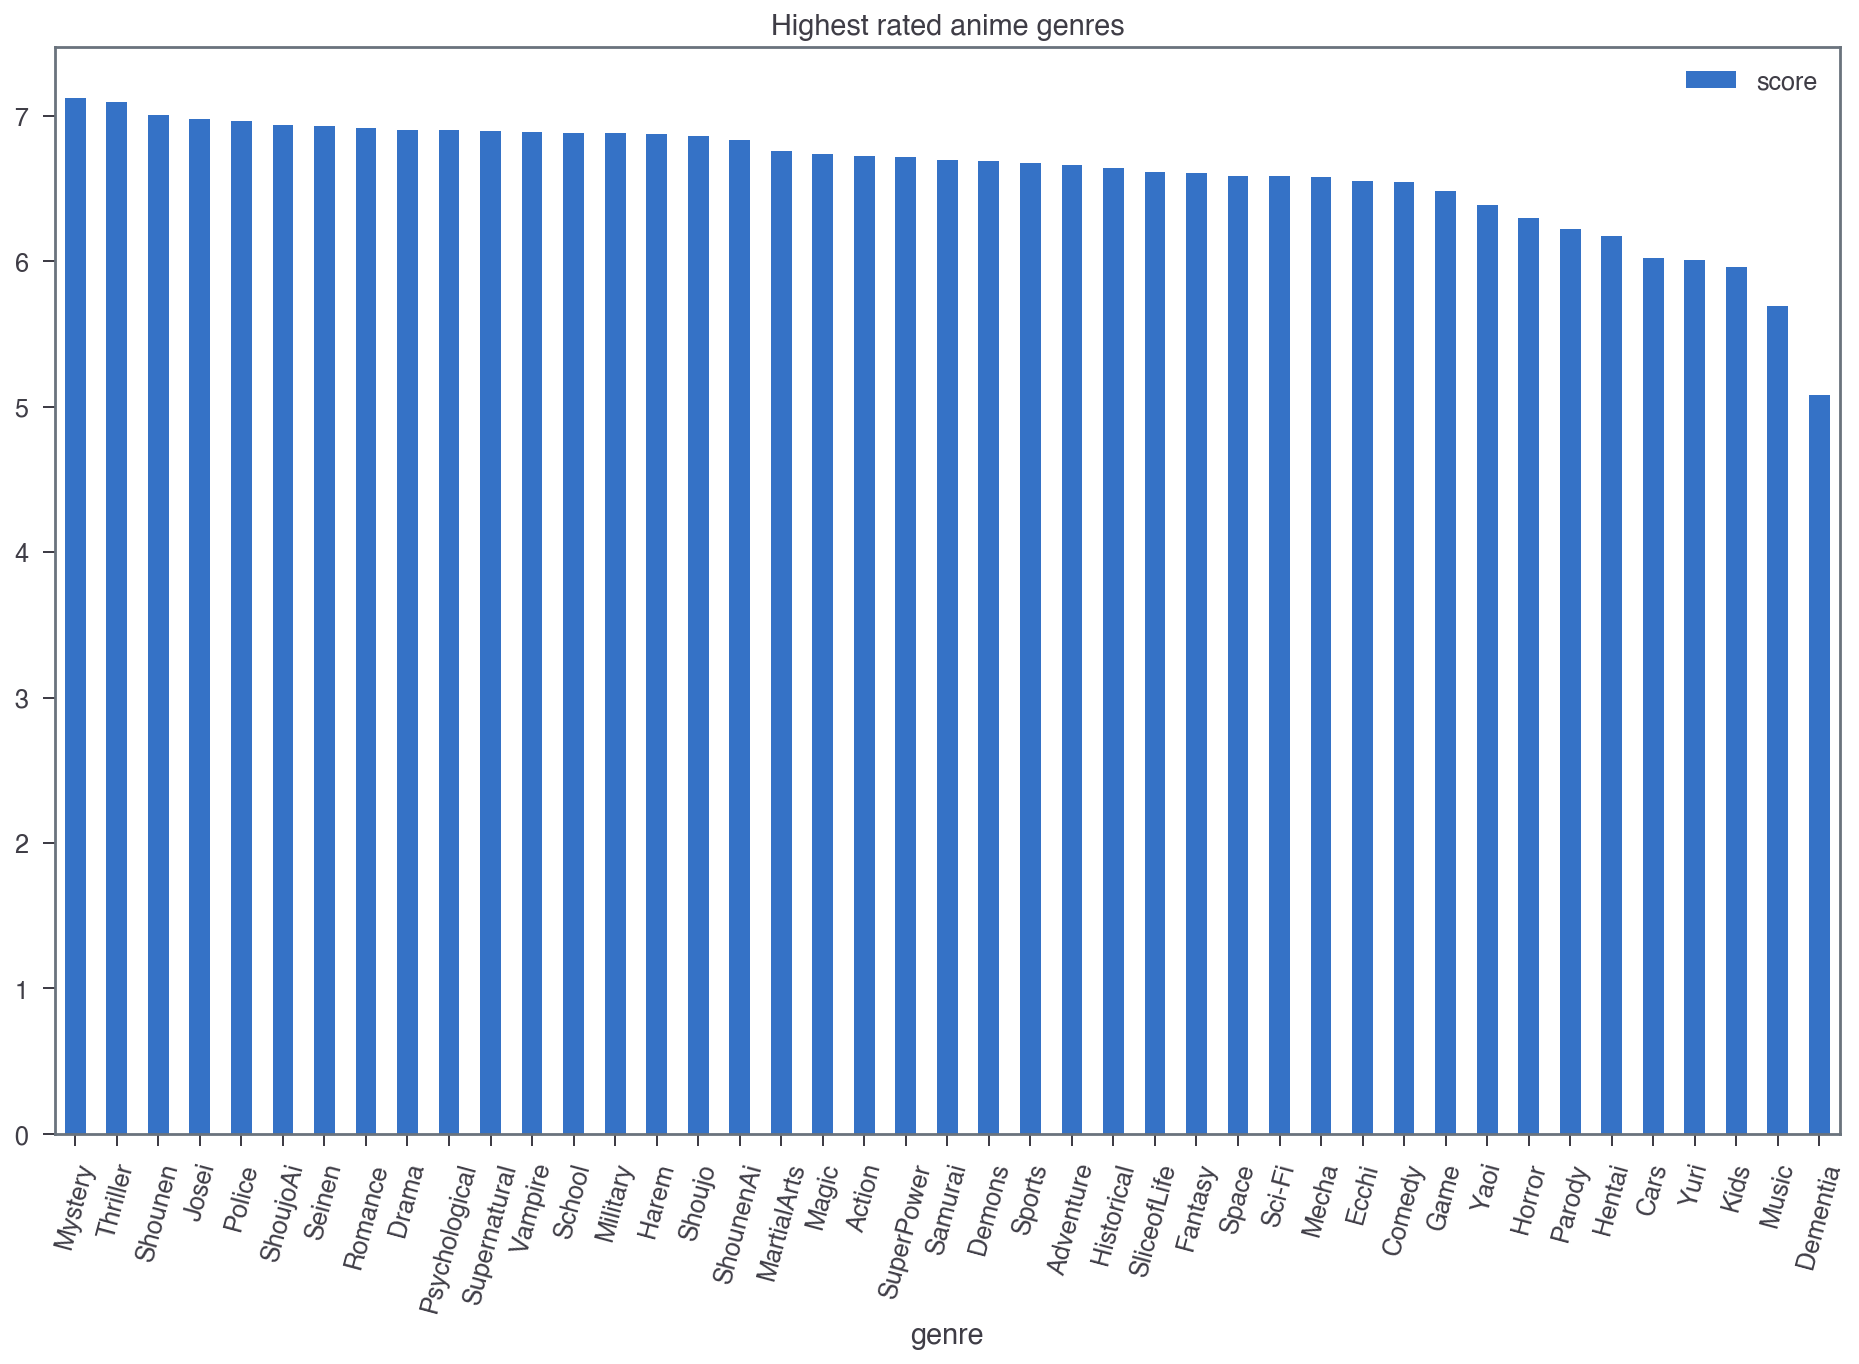

In [176]:
# Which genres are the highest scored?
genre_score = animes.groupby('genre', as_index = False).agg(
    {'score': 'mean'}).sort_values('score', ascending = False).reset_index(drop = True)
genre_score

# Plot to visualize the table with the highest scored animes
genre_score.plot(x = 'genre', y = 'score', kind = 'bar', 
                 figsize = (16, 10), title = 'Highest rated anime genres', rot = 75);

# aqui pode ser interessante olhar para os outliers
plt.savefig('test', dpi = 300, bbox_inches = 'tight');

### Difference between max and min of the scoring range per genre

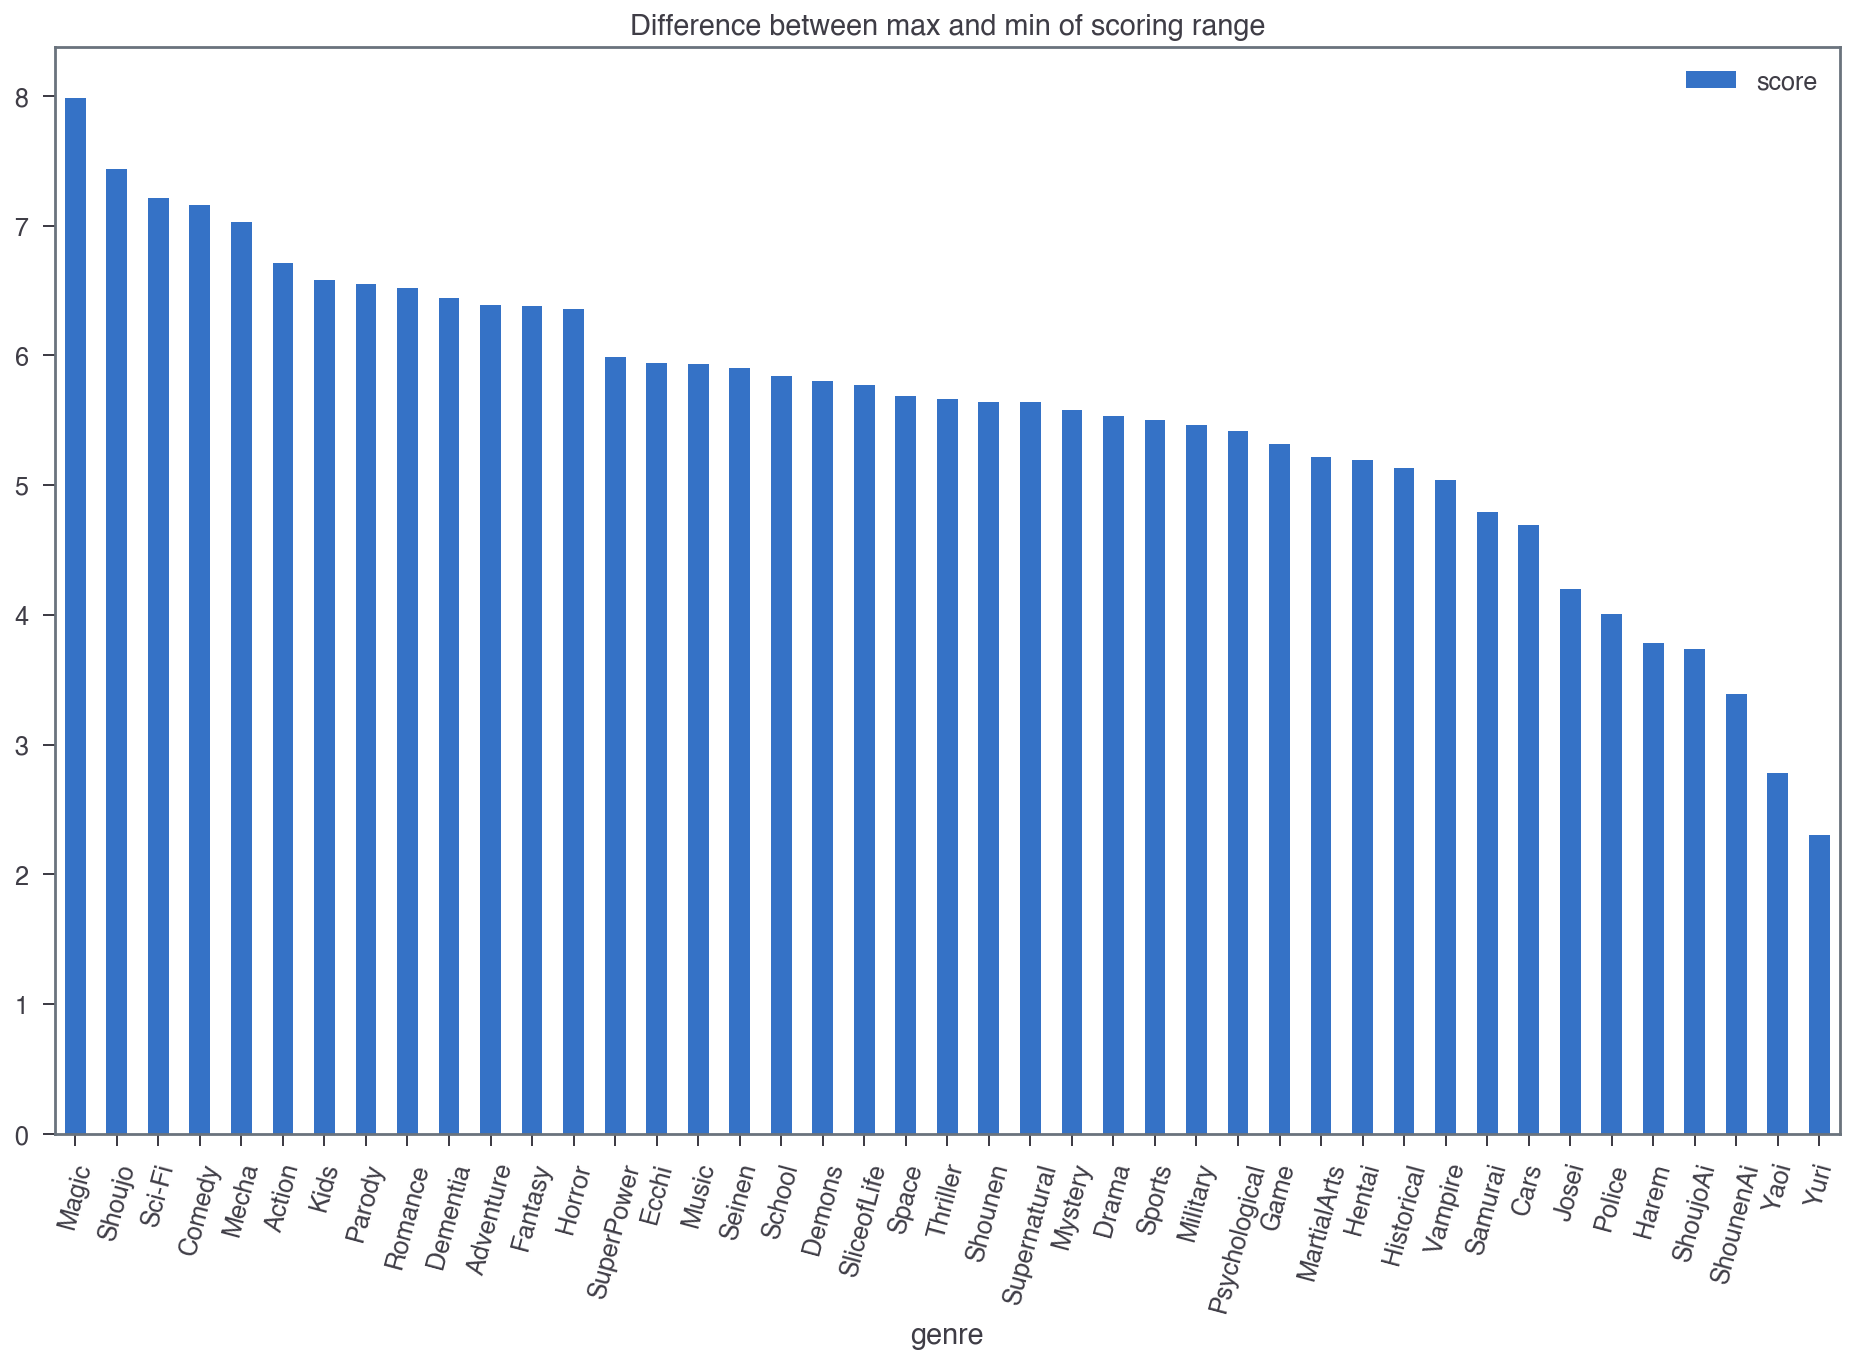

In [22]:
# Difference between max and min of the scoring range
# 'y' is now representing this change - this means that there are people who really love the anime and those who hate it
# 'Magic' viewers are really disperse, and 'yuri' viewers are more concise
genre_score = animes.groupby('genre', as_index = False).agg(
    {'score': lambda x: x.max() - x.min()}).sort_values('score', ascending = False).reset_index(drop = True)
genre_score

# Plot to visualize the table with the highest scored animes
genre_score.plot(x = 'genre', y = 'score', kind = 'bar', 
                 figsize = (16, 10), title = 'Difference between max and min of scoring range', rot = 75);

# por retangulo nos generos top 10 pra loc nesse plot
# a confirmar se a opiniao dos users é consensual relativamente ao ranking do top 10
# os do lado direito sao mais consensuais e nao ha tanto risco em apostar nesses animas, nao ha mta disparidade nas ponts
# referir a escala do score 0-10

### Most popular genres

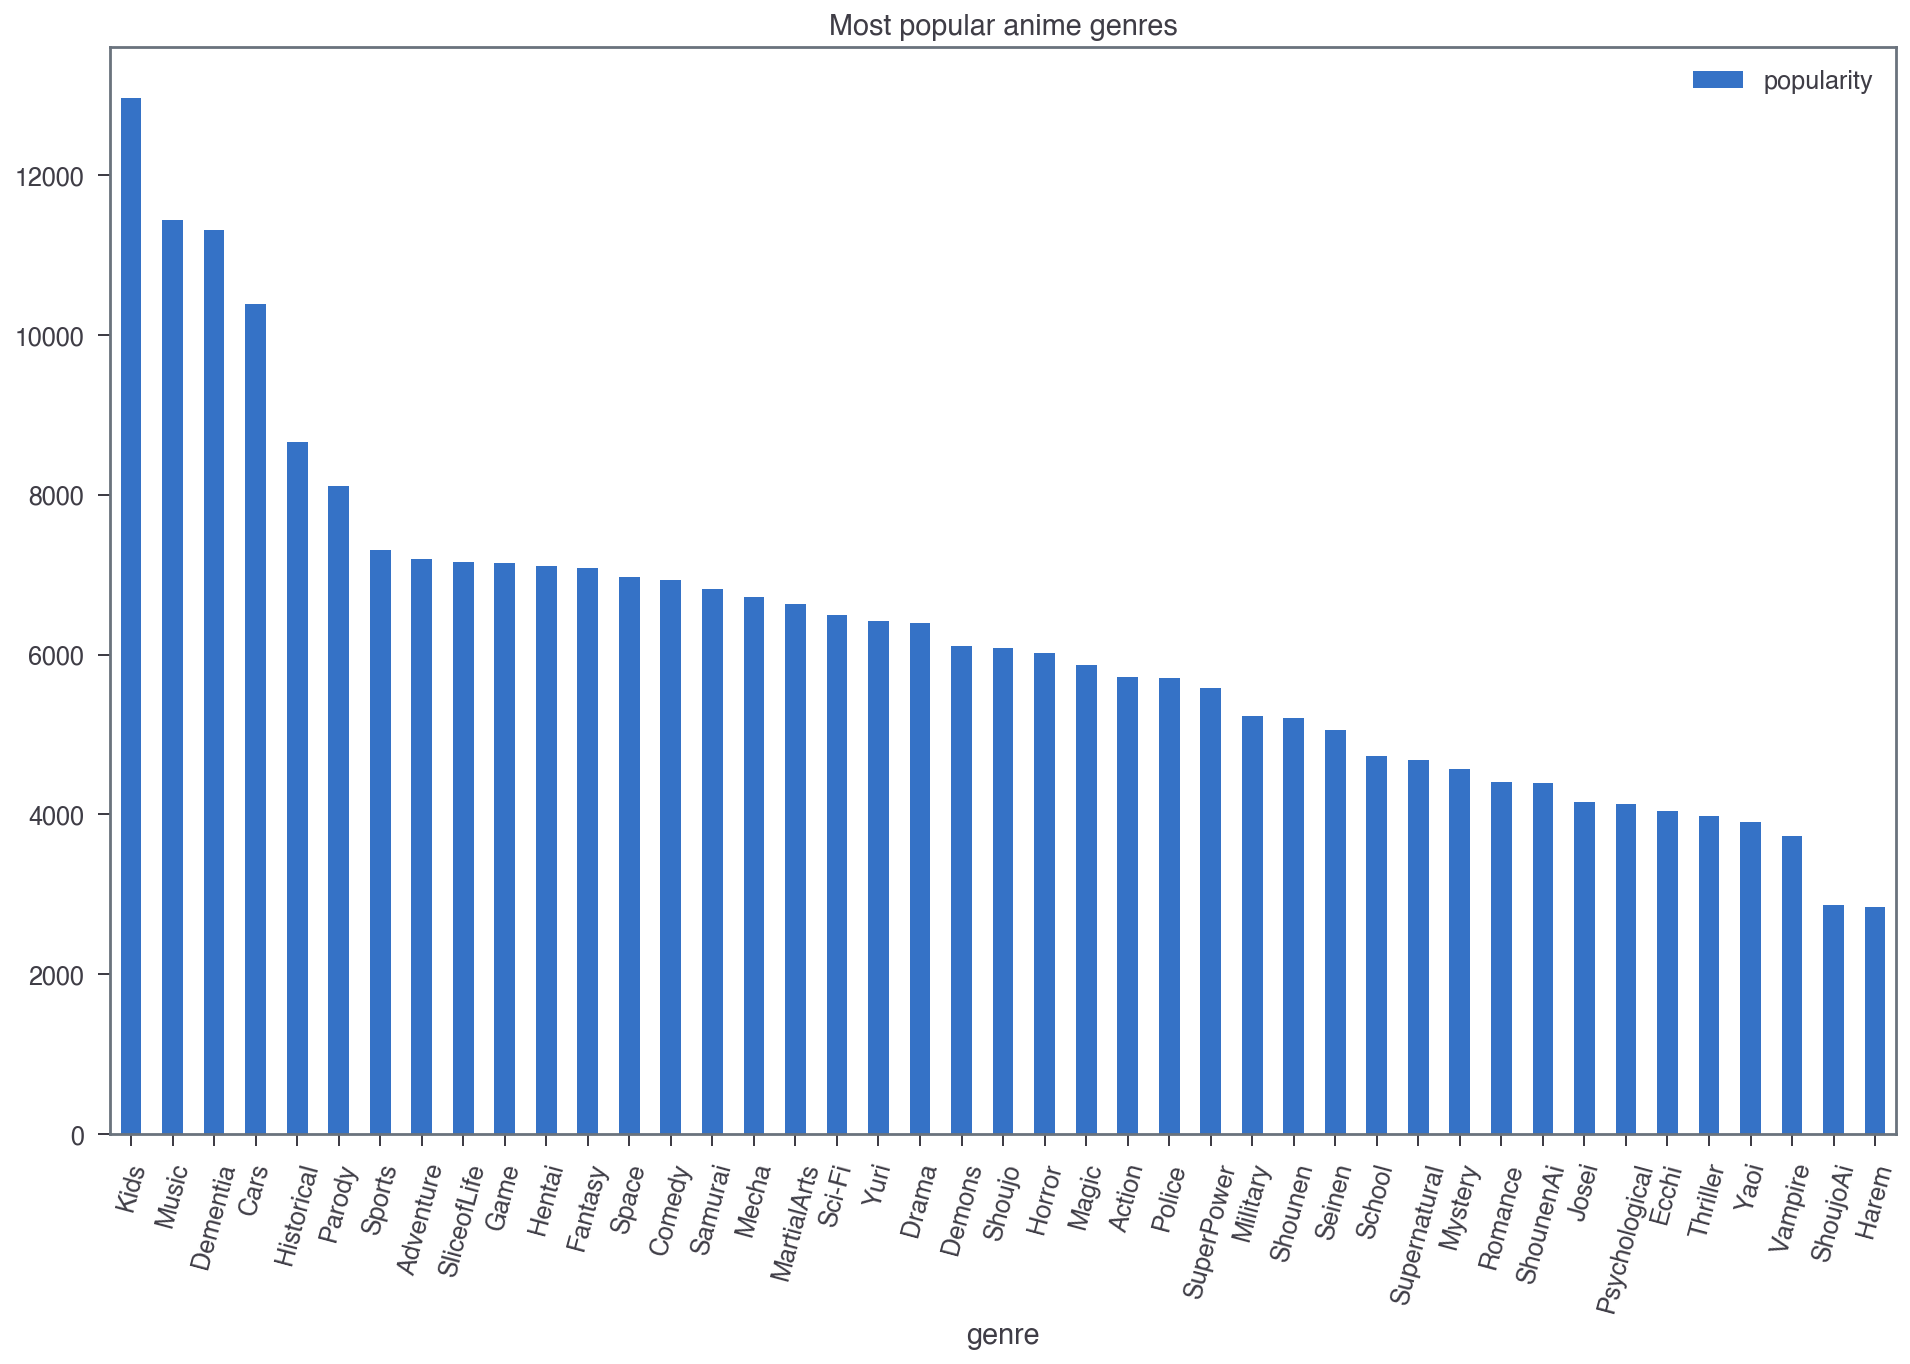

In [140]:
# Which genres are the most popular?
'''
# Popularity is the ranking system based on the # of users who have a certain anime in their list (aka members)
'''
# Doubts between mean and sum on popularity
genre_pop = animes.groupby('genre', as_index = False).agg(
    {'popularity': 'mean'}).sort_values('popularity', ascending = False).reset_index(drop = True)
genre_pop

# Plot to visualize the table with the most popular anime genres
genre_pop.plot(x = 'genre', y = 'popularity', kind = 'bar', 
                 figsize = (16, 10), rot = 75, title = 'Most popular anime genres');

# posso marcar com retangulos tbm etc

### Users' gender bar plot

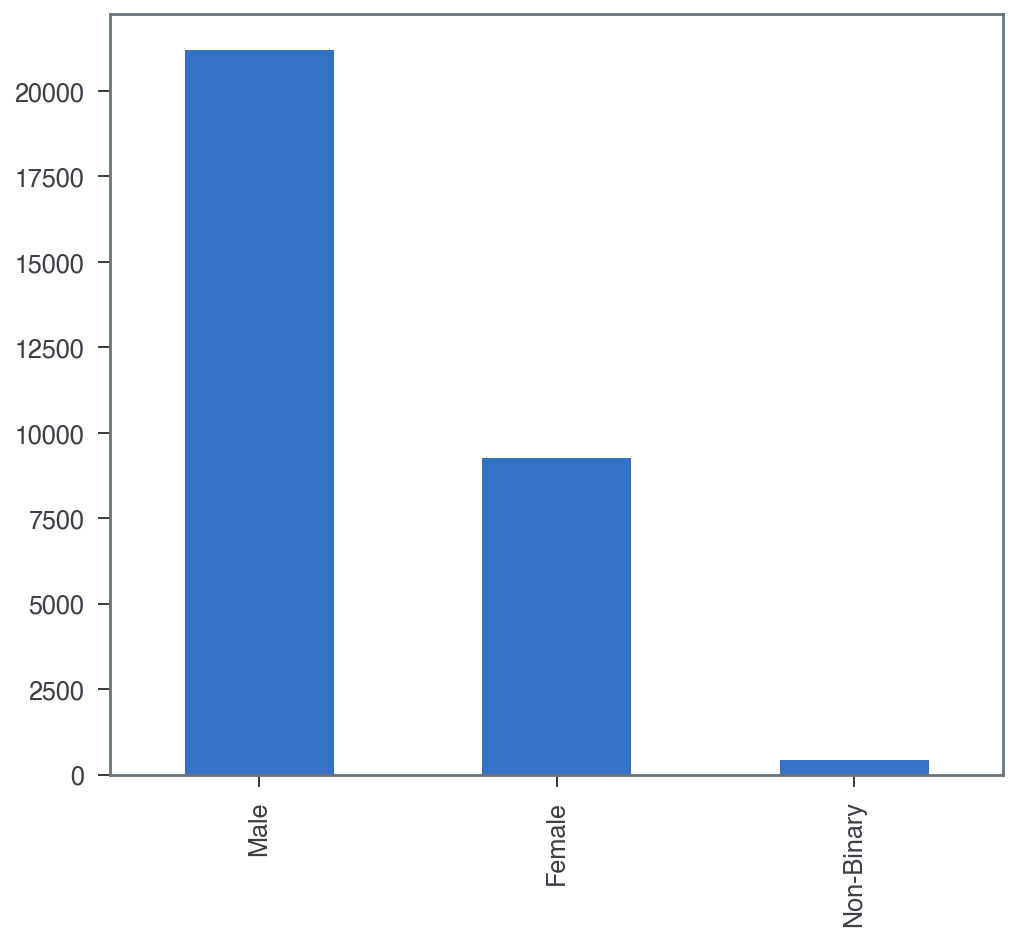

In [24]:
# Bar chart for the gender column
profiles['gender'].value_counts().plot(kind = 'bar');

### Users' gender pie chart

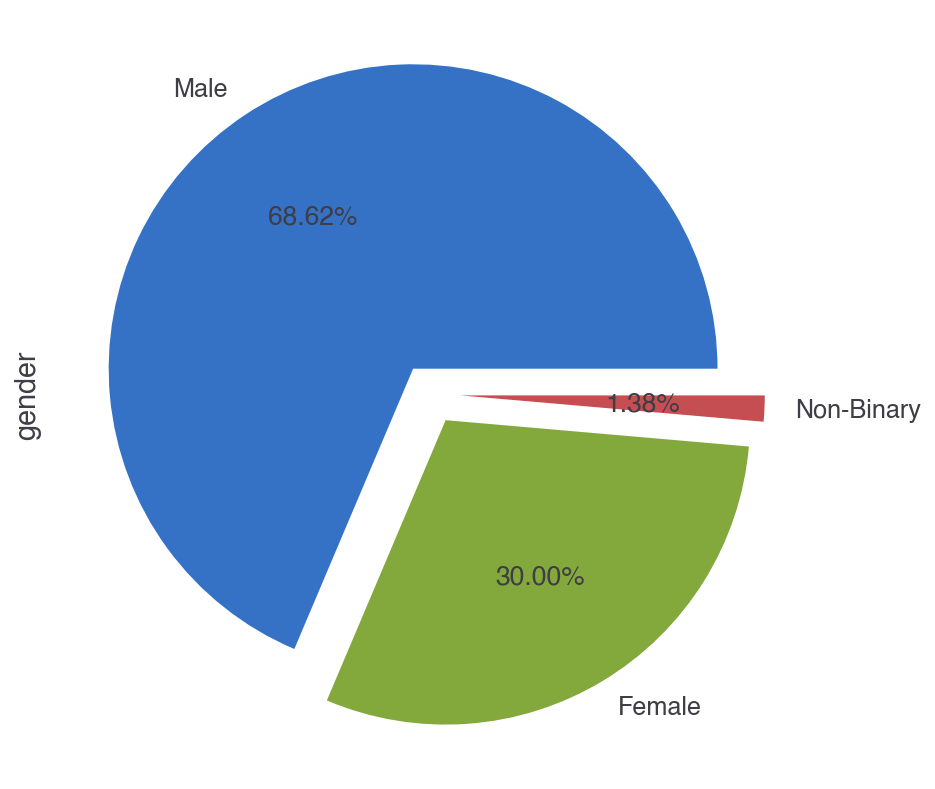

In [170]:
# We can see the vast majority are males, at almost 70%. However, females still take a pretty good chunk of the plot,
# with 30% presence
explode = [0.1, 0.1, 0.1,]
profiles['gender'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = explode);

In [26]:
print(animes.aired.min())
#animes[animes.aired.str.contains('1917')]

1917


In [27]:
# Getting the animes dataset again to have the genres compressed to test some stuff
# Just if I wanna know metrics of a specific anime
animes_og = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/Projects/Project-Week-6/your-project/Datasets/\
myanimelist-dataset-animes-profiles-reviews/animes.csv')

animes_og.drop(columns = ['img_url', 'link'], inplace = True)

In [28]:
print(animes_og.duplicated().sum()) # seems like og dataset has dupes - will drop them
animes_og.drop_duplicates(inplace = True)
print(animes_og.duplicated().sum())

2943
0


In [53]:
# get a df with these 3 cols: popularity, # of faves and anime_id
# then i can remove dupes and i shud only have 1 anime per row and no need to do a groupby
profiles_exp.reset_index(drop = True, inplace = True)
new_df = animes_og[['uid', 'popularity']] # getting anime_id and popularity columns
new_df['favorites_anime'] = profiles_exp['favorites_anime'] # getting faves column

new_df.duplicated().sum() # 2 dupes
new_df.drop_duplicates(inplace = True) # dropped the dupes
#new_df

/Users/mattymrc/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mattymrc/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
print(test.shape)
print(test.isna().sum())

(16368, 4)
uid                  0
popularity           0
favorites_anime_x    0
profile              0
dtype: int64


In [81]:
# Numb of users who faved that anime id
a = profiles_exp.groupby('favorites_anime', as_index = False).agg({'profile': 'count'})

# Fixing this problem with empty cells
new_df['favorites_anime'] = np.where(new_df['favorites_anime'] == '', -1, new_df['favorites_anime'])
a['favorites_anime'] = np.where(a['favorites_anime'] == '', -1, a['favorites_anime'])

# Converting to int
a['favorites_anime'] = a['favorites_anime'].astype(int)

# Merging to have it only on one df and to plot it
test = new_df.merge(a, left_on = 'uid', right_on = 'favorites_anime', how = 'left')
test.drop(columns = 'favorites_anime_y', inplace = True)

# Sorting by popularity to make the other plot be a line going up
test = test.sort_values('popularity').reset_index(drop = True)
test.fillna(0, inplace = True) # had a huge amount of nans 11k of 16k rows, so I just filled with 0
# this is because there are many anime that aren't in anyone's favs list

/Users/mattymrc/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


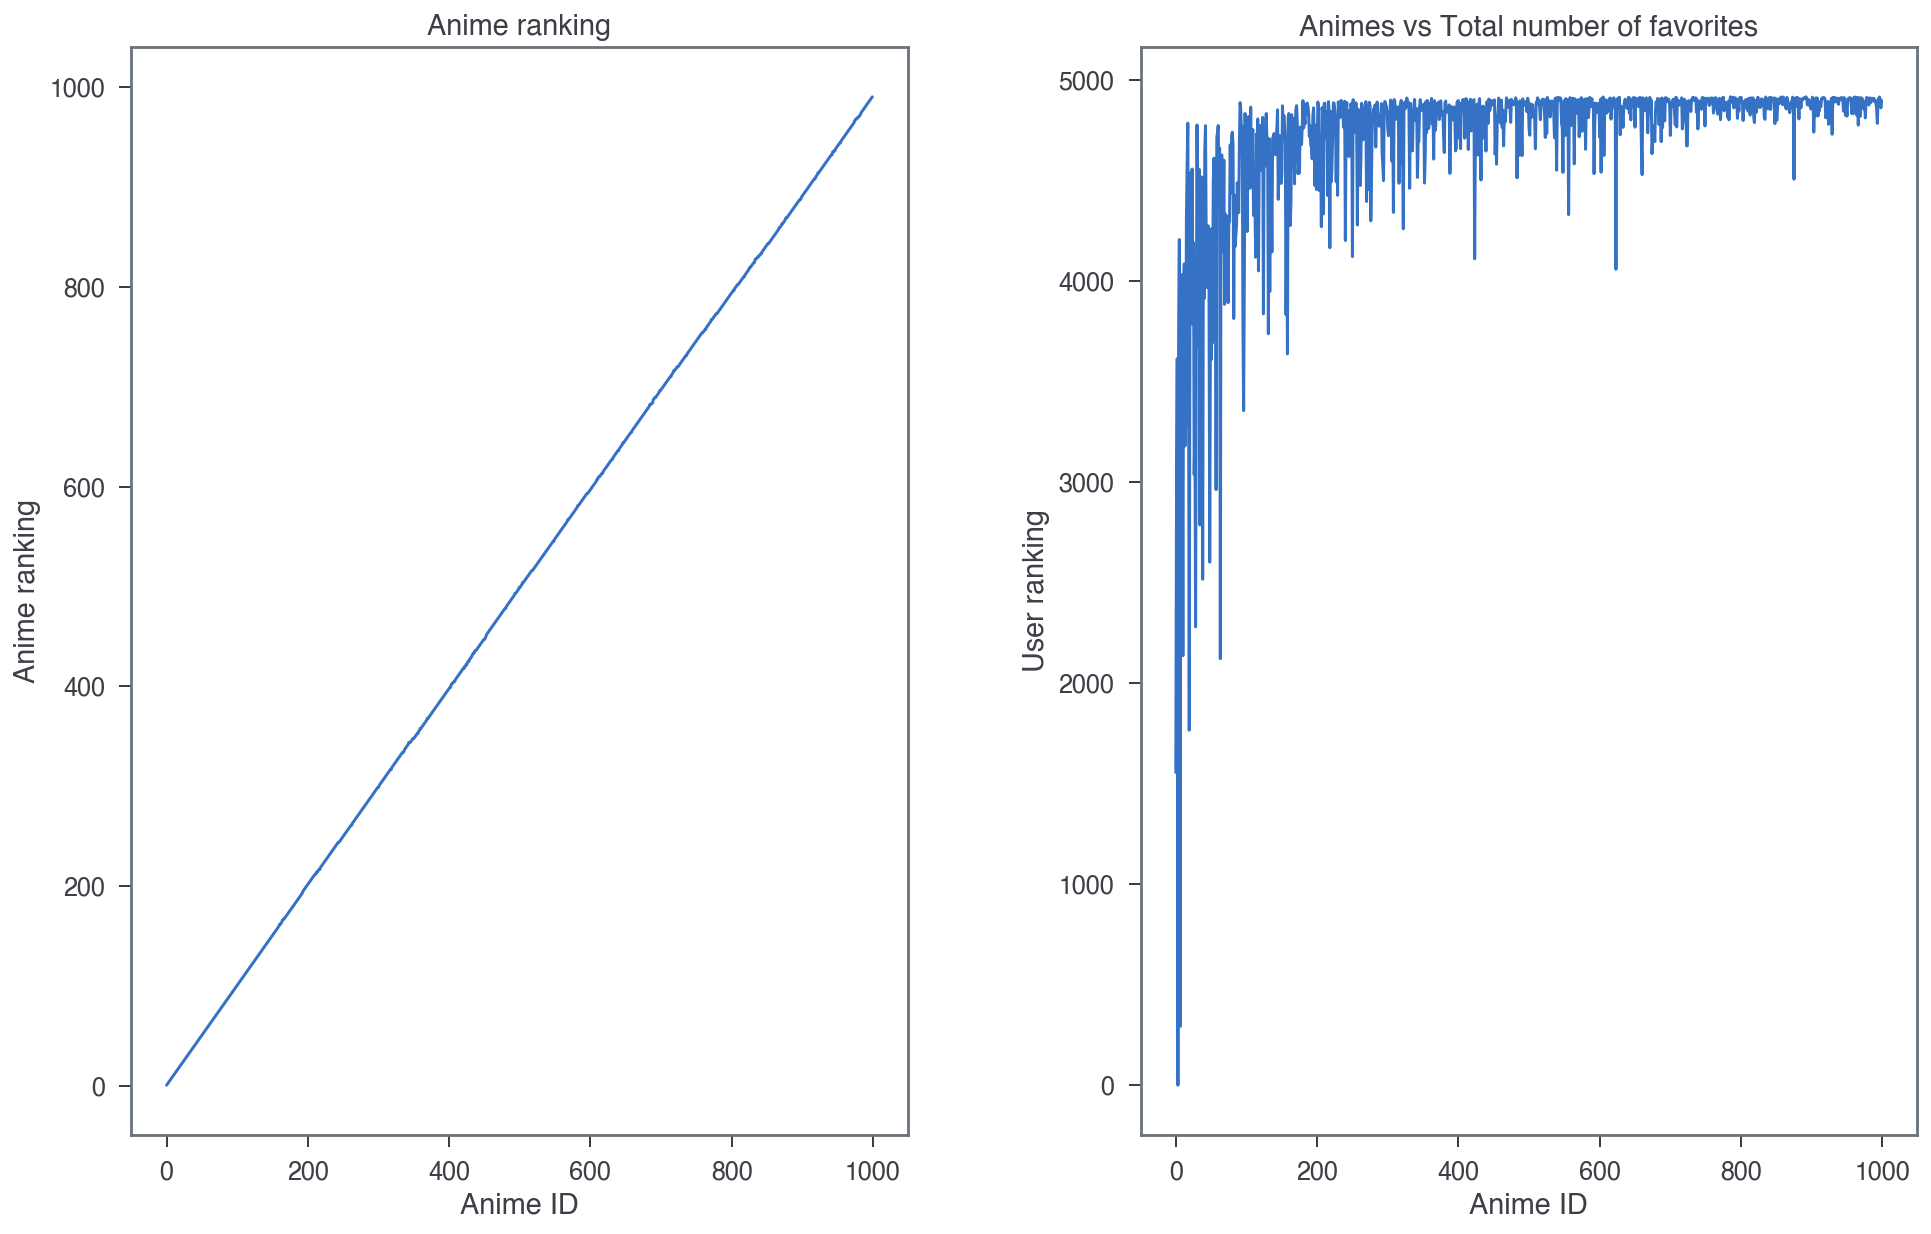

In [165]:
# This should be anime_id on x vs popularity on y
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (16,10))
plt.subplots_adjust(wspace = 0.3)
x = test.index[:1000]
y_1 = test['popularity'][:1000]
y_2 = test['profile'].max() - test['profile'][:1000]

ax[0].plot(x, y_1)
ax[0].set_ylabel('Anime ranking')
ax[0].set_title('Anime ranking')
ax[0].set_xlabel('Anime ID')

ax[1].plot(x, y_2)
ax[1].set_ylabel('User ranking')
ax[1].set_title('Animes vs Total number of favorites')
ax[1].set_xlabel('Anime ID');
#plt.savefig('anime_ranking_vs_numb_faves')
# isso [0] é só um ranking - pode ser interessante se esse ranking está de acordo com o que aparece na lista de faves
# a distrib dos animes nao é linear, é como se fosse hiperbolica - mta dif entre o anime 1 e 2 p.ex
# The animes distribution for user favorites doesn't match the website's ranking

## Hypothesis Testing

In [86]:
# T TESTING
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway # in case wanna try anova for some reason
#f_oneway(ab_test['a'], ab_test['b'])


print(ttest_rel(y_1, y_2)) # a dist dos animes preferidos das pessoas é diferente do ranking de popularidade
# quando mostrar os dois graficos acima dizer que fiz um test stat e deu diferente e ficou comprovado q sao dif

Ttest_relResult(statistic=87.98348116183193, pvalue=0.0)


In [187]:
# T test between the means of the comedy and romance genre
comedy = animes[animes['genre'] == 'Comedy']
romance = animes[animes['genre'] == 'Romance']
action = animes[animes['genre'] == 'Action']
adventure = animes[animes['genre'] == 'Adventure']
fantasy = animes[animes['genre'] == 'Fantasy']
drama = animes[animes['genre'] == 'Drama']

# I can reject the H0 that their means are equal
print('Comedy vs Action:', ttest_ind(comedy['members'], action['members'], equal_var = False))

# I can reject the H0 that their means are equal
print('Comedy vs Romance:', ttest_ind(comedy['members'], romance['members'], equal_var = False))

# I can reject the H0 that their means are equal
print('Comedy vs Drama:', ttest_ind(comedy['members'], drama['members'], equal_var = False))

# I cannot reject the H0 that their means are equal - would need 68% alpha to reject
print('Comedy vs Adventure:', ttest_ind(comedy['members'], adventure['members'], equal_var = False))

# I cannot reject the H0 that their means are equal - would need 78% alpha to reject
print('Comedy vs Fantasy:', ttest_ind(comedy['members'], fantasy['members'], equal_var = False))

Comedy vs Action: Ttest_indResult(statistic=-6.450804222568365, pvalue=1.1986430203709975e-10)
Comedy vs Romance: Ttest_indResult(statistic=-9.733693547857074, pvalue=5.286266403405987e-22)
Comedy vs Drama: Ttest_indResult(statistic=-4.32611412394199, pvalue=1.5557834827370583e-05)
Comedy vs Adventure: Ttest_indResult(statistic=0.9903957866733978, pvalue=0.32202851835968754)
Comedy vs Fantasy: Ttest_indResult(statistic=-1.201937562805769, pvalue=0.22943939706757024)


In [183]:
# Just checking the dementia genre for fun
dementia = animes[animes['genre'] == 'Dementia']
dementia.sort_values('aired', ascending = False).head(30)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
17854,35842,FLCL Alternative,Life seems to drift by for Kana Koumoto and he...,Dementia,"Sep 7, 2018",1.0,57195,1729,4952.0,6.73
7630,31501,Master Blaster,Short film by Kabuki Sawako with music by Suga...,Dementia,"Sep 30, 2014",1.0,532,10858,11373.0,4.19
5044,39872,Chiruri,The story of a boy and a girl who try to find ...,Dementia,"Sep 29, 2011",1.0,156,14335,8408.0,5.98
12032,33010,FLCL Progressive,Hidomi Hibajiri is a dissilusioned young girl ...,Dementia,"Sep 28, 2018",1.0,86206,1262,5860.0,6.54
13546,40209,Subarashii Shigoto,An office worker observes and reports on the w...,Dementia,"Sep 28, 2015",1.0,74,15911,14041.0,4.61
4272,2346,Koroshiya 1 The Animation: Episode 0,A masochistic mobster meets his match in the d...,Dementia,"Sep 27, 2002",1.0,7649,4830,8985.0,5.80
7243,39996,Ake-Vono,Music video directed by Kouhei Yoshino for the...,Dementia,"Sep 26, 2013",1.0,96,15447,9705.0,5.56
13493,40159,The Ghost of Cartoon,Space Shower TV Station ID directed by Ryuu Oo...,Dementia,"Sep 24, 2015",1.0,74,15868,14198.0,4.41
5042,9990,Midori-ko,One of the must-see gems making its premiere a...,Dementia,"Sep 24, 2011",1.0,1584,8505,8391.0,5.99
7734,5622,The Chocolate Panic Picture Show,"Gainax's first professional production, The Ch...",Dementia,"Sep 21, 1985",1.0,2133,7803,11272.0,4.54


In [188]:
pp = merged.copy()
pp = pp.rename(columns = {'uid_x': 'anime_id'})
pp.drop(columns = ['anime_uid', 'link'], inplace = True)
pp.head()
pp.corr() # pop and ranked 0.74, members and score_x 0.52
# ranked and score_x -0.9

,anime_id,episodes,members,popularity,ranked,score_x,uid_y,score_y
anime_id,1.000000,-0.176906,-0.113542,0.122962,0.185021,-0.126641,0.603954,-0.114948
episodes,-0.176906,1.000000,0.200632,-0.105627,-0.139891,0.153346,-0.072999,0.066069
members,-0.113542,0.200632,1.000000,-0.452500,-0.456746,0.521908,0.002510,0.164081
popularity,0.122962,-0.105627,-0.452500,1.000000,0.743393,-0.617258,-0.010378,-0.176555
ranked,0.185021,-0.139891,-0.456746,0.743393,1.000000,-0.917797,0.031926,-0.412110
score_x,-0.126641,0.153346,0.521908,-0.617258,-0.917797,1.000000,-0.004423,0.425944
uid_y,0.603954,-0.072999,0.002510,-0.010378,0.031926,-0.004423,1.000000,-0.126613
score_y,-0.114948,0.066069,0.164081,-0.176555,-0.412110,0.425944,-0.126613,1.000000
